# Global Terrorism Data



## Goal: Build a model that can predict what group may have been responsible for an incident. 

# The notebook is divided into 2 parts:
## 1. Exploratory Data Analysis: Visualization
## 2. Predicting  group using RNN_LSTM

    

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns; sns.set()
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
!pip install sklearn

In [3]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [149]:
import chardet
file="/content/data_2015_17.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [150]:
#Reading whole data sheet as pandas dataframe
# filename = '/content/gdrive/MyDrive/GTD/data_til_2010.csv'
#filename = '/content/gdrive/MyDrive/GTD/data_1970_80.csv'
# filename = '/content/gdrive/MyDrive/GTD/data_1981_95.csv'
# filename = '/content/gdrive/MyDrive/GTD/data_96_2010.csv'
# filename = '/content/gdrive/MyDrive/GTD/data_2011_12.csv'
# filename = '/content/gdrive/MyDrive/GTD/data_2013_14.csv'
#filename = '/content/gdrive/MyDrive/GTD/data_2015_17.csv'


df = pd.read_csv(file ,encoding = "ISO-8859-1")
print(df.info())
# target = "city"
# target = "targtype1_txt"
# target = "weaptype1_txt"




ParserError: ignored

In [125]:
#Renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                     'nkill':'Killed','nwound':'Wounded','gname':'Group',
                     'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','city':'City'},inplace=True)

#Selecting few columns for analysis
          
df1 = df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType',
             'Killed','Wounded','Target','Group','Target_type','Weapon_type','Motive']]
          
#Creating new column by merging 2 columns
df1['casualities'] = df1['Killed']+df1['Wounded']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# Part1: Exploratory Data Analysis

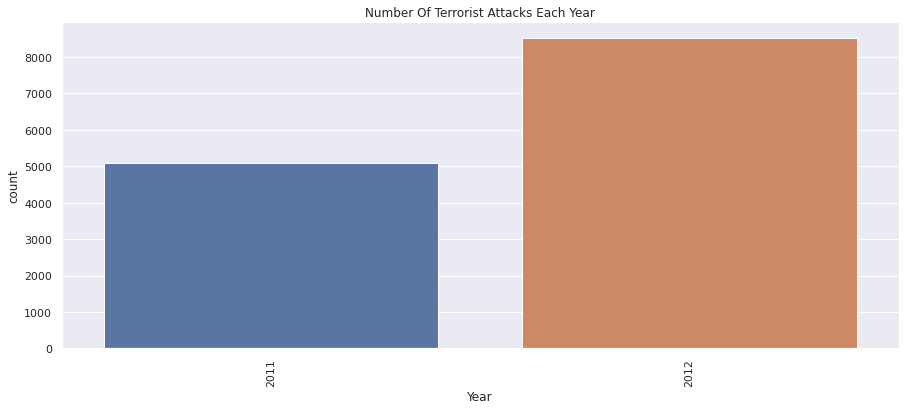

'From below graph we can see that from 2005, incidents of attack have increased. This may be due to on-going war,\nand border issues  between various contries.\nAlso, number of attacks have increased from 1970, that may have correlation with increase in population'

In [108]:
#Terrorist Attack Over Time

plt.subplots(figsize=(15,6))
sns.countplot(x = 'Year',data=df1)
#ns.countplot(x="class", data=titanic)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

'''From below graph we can see that from 2005, incidents of attack have increased. This may be due to on-going war,
and border issues  between various contries.
Also, number of attacks have increased from 1970, that may have correlation with increase in population'''

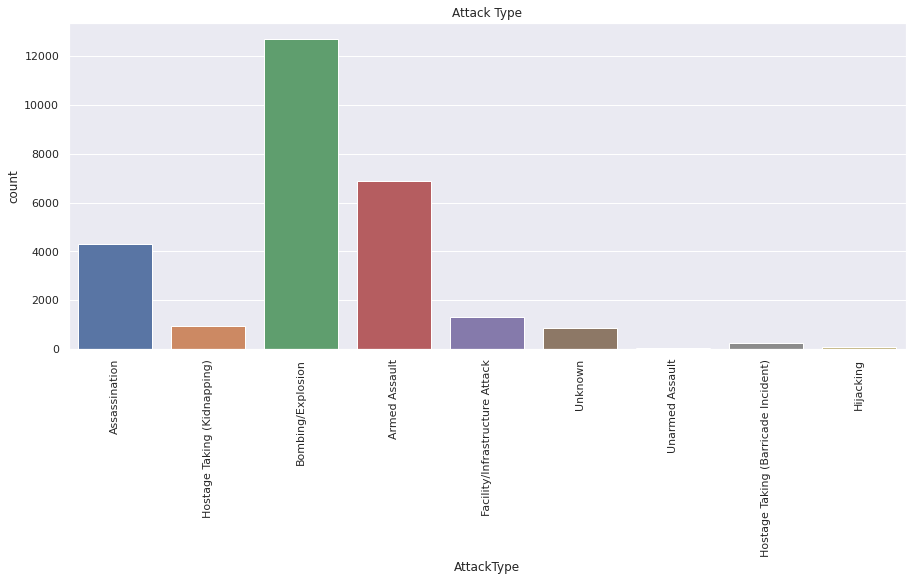

'From below graph we can see that Bombing and Explosion is the top choice of attacker, followed by Armed Assault.\nWith this information in hand, goverment can pass stricter law for explosive material bussiness, to control the attacks'

In [86]:
#Attack Type
plt.subplots(figsize=(15,6))
sns.countplot(x = 'AttackType',data=df1)
plt.xticks(rotation=90)
plt.title('Attack Type')
plt.show()

'''From below graph we can see that Bombing and Explosion is the top choice of attacker, followed by Armed Assault.
With this information in hand, goverment can pass stricter law for explosive material bussiness, to control the attacks'''

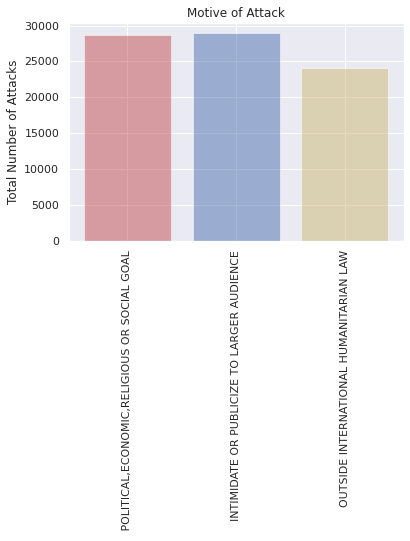

'From the above graph we can see that main motive of attacks was to INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE\nfollowed by POLITICAL,ECONOMIC,RELIGIOUS OR SOCIAL GOAL'

In [126]:


#Attack Motive
#Motive column have text data. So, it will not be feasible to plot the data on graph.
#Instead 3 columns (crit1, crit2, crit3)  corresponding to motive can be used
criteria1_count = df['crit1'].sum()
criteria2_count = df['crit2'].sum()
criteria3_count = df['crit3'].sum()
 
objects = (' POLITICAL,ECONOMIC,RELIGIOUS OR SOCIAL GOAL', 'INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE', 'OUTSIDE INTERNATIONAL HUMANITARIAN LAW')
y_pos = np.arange(len(objects))
performance = [criteria1_count,criteria2_count,criteria3_count]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color= {'b','r','y'})
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('Total Number of Attacks')
plt.title('Motive of Attack')
 
plt.show()
'''From the above graph we can see that main motive of attacks was to INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE
followed by POLITICAL,ECONOMIC,RELIGIOUS OR SOCIAL GOAL'''

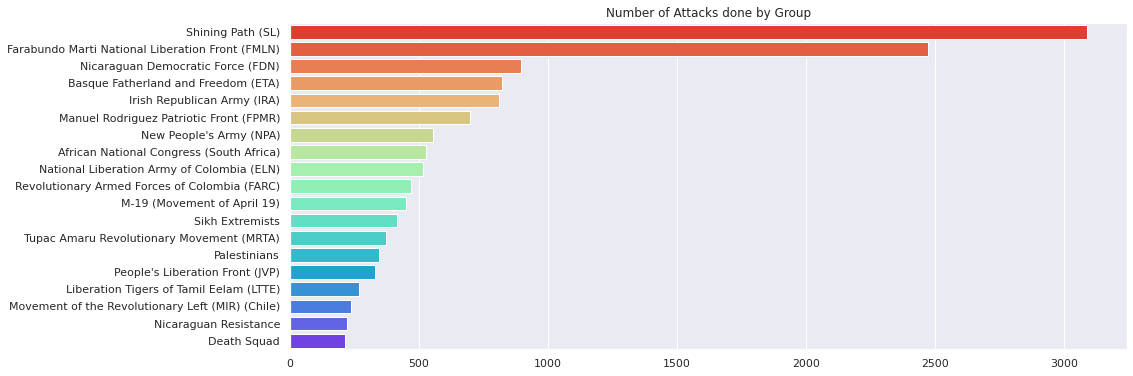

'From below graph we can infer that Taliban, Islamic State of Iraq and Shining Path are the most active groups'

In [88]:
#Attacks distribution by Group
plt.subplots(figsize=(15,6))
sns.barplot(x = df['Group'].value_counts()[1:20].values, y = df['Group'].value_counts()[1:20].index, palette = 'rainbow_r')
plt.title('Number of Attacks done by Group')
plt.show()

'''From below graph we can infer that Taliban, Islamic State of Iraq and Shining Path are the most active groups'''

In [89]:
print ('Country with Highest Terrorist Attacks:',df1['Country'].value_counts().index[0])
print ('Regions with Highest Terrorist Attacks:',df1['Region'].value_counts().index[0])
df = (df1.groupby(['Country']).sum())
print ('Country with Highest Casualities:',df.sort_values(by = ['casualities'],ascending=[False]).index[0])

Country with Highest Terrorist Attacks: Peru
Regions with Highest Terrorist Attacks: South America
Country with Highest Casualities: El Salvador


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


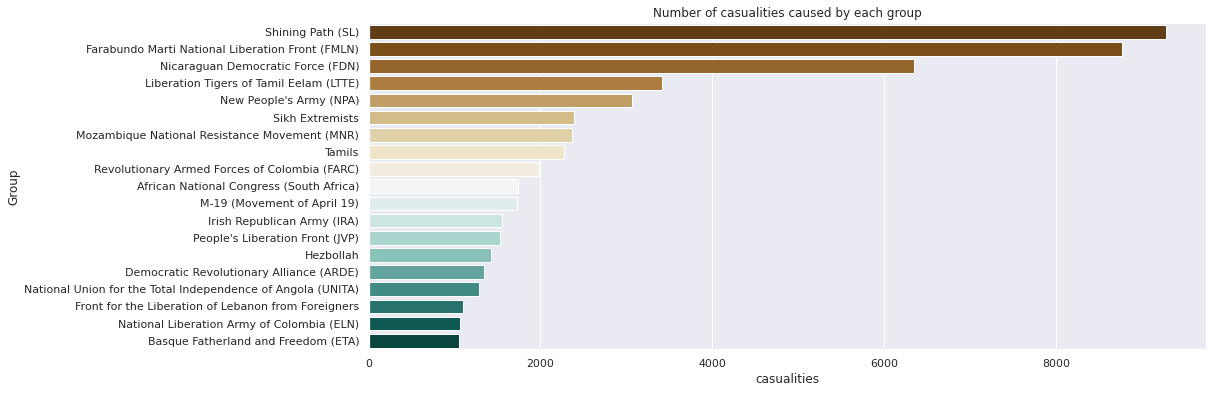

In [90]:
#Number of people died or Wounded
plt.subplots(figsize=(15,6))
data_group = df1.groupby(['Group']).sum()
data_group = data_group.sort_values(by = ['casualities'], ascending = False)
sns.barplot (data_group['casualities'][1:20],data_group.index[1:20],palette = 'BrBG')
plt.title('Number of casualities caused by each group')
plt.show()

#From below graph we can see that people were effected most by Islamic State of Irag and the Levant

# Part 2: Predictive Modeling -> LSTM - RNN

In [127]:
#Reading the file and merging year, month, dyy column to make the data a time series dataset/
df =  pd.read_csv(file, 
                 parse_dates={'dt' : ['iyear', 'imonth','iday']}, infer_datetime_format=True, index_col='dt',encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (61,62,63,79,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [128]:
#print (df.head())
df.head()

,eventid,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,2.010000e+11,NaN,0,NaN,153,Pakistan,6,South Asia,Khyber Pakhtunkhwa,Bannu,32.987347,70.602524,1,0,Inside the Miryan Police limits,01/01/2013: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Pakistani Police,Miryan Police Station,153.0,Pakistan,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
2013-01-01,2.010000e+11,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Saladin,Tuz Khormato,34.881348,44.625130,1,0,NaN,01/01/2013: An explosives-laden vehicle detona...,1,1,1,0.0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,75.0,Village/City/Town/Suburb,Not Applicable,Civilians,95.0,Iraq,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,5.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Nearby homes and a fuel station were damaged i...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
2013-01-01,2.010000e+11,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Saladin,Tuz Khormato,34.881348,44.625130,1,0,NaN,01/01/2013: At least two explosives detonated ...,1,1,1,0.0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Iraqi Police Service (IPS),Police First Responders,95.0,Iraq,14.0,...,NaN,NaN,NaN,0.0,0.0,0.0,5.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Nearby homes and a fuel station were damaged i...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
2013-01-01,2.010000e+11,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,44.375465,1,0,Southern Kirkuk,01/01/2013: An explosive device detonated targ...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Iraqi Police Service (IPS),Patrol,95.0,Iraq,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A patrol vehicle was damaged in this attack.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers for this incident conflict ac...,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,-9,-9,0,-9,NaN
2013-01-01,2.010000e+11,NaN,0,NaN,153,Pakistan,6,South Asia,Sindh,Karachi,24.891115,67.143311,1,0,The incid

In [129]:
target = "gname"
# target = "targtype1_txt"
#Including only those rows where attack group name is sure.
df2 = df[(df['guncertain1'] == 0)]


In [130]:

#Finding the group names which have done 10 or more number of attacks, so that model can be trained well
modeling_y = df2[target].value_counts(sort=True, ascending=False).keys().tolist()[0:530]

# Taking only those rows which belong to one of the 530 group names
df3 = df[df[target].isin(modeling_y)]



In [131]:
#Droping Group name = Unknown
final_df = df3[(df3[target] != 'Unknown')]

#Converting Group column into categorical datatype
final_df[target] = final_df[target].astype('category')

#Creating numeric values for Group names
final_df['target_variable'] =  final_df[target].cat.codes

print (final_df.head(5))

                 eventid approxdate  extended  ...  INT_ANY  related target_variable
dt                                             ...                                  
2013-01-01  2.010000e+11        NaN         0  ...        0      NaN             380
2013-01-01  2.010000e+11        NaN         0  ...        0      NaN             380
2013-01-01  2.010000e+11        NaN         0  ...        0      NaN             100
2013-01-01  2.010000e+11        NaN         0  ...        0      NaN             380
2013-01-02  2.010000e+11        NaN         0  ...        0      NaN             100

[5 rows x 133 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:

#Selecting limited columns for modeling
selected_data = final_df[['target_variable','targtype1','targsubtype1','weapsubtype1','weaptype1','suicide','nwound','nkill','success','attacktype1','region','country','crit1','crit2','crit3','extended']]
print (selected_data.info())
x = selected_data.dropna()
print (x.info())
print (x.head(5))
x.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12123 entries, 2013-01-01 to 2014-12-31
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target_variable  12123 non-null  int16  
 1   targtype1        12123 non-null  int64  
 2   targsubtype1     11731 non-null  float64
 3   weapsubtype1     10732 non-null  float64
 4   weaptype1        12123 non-null  int64  
 5   suicide          12123 non-null  int64  
 6   nwound           10320 non-null  float64
 7   nkill            11176 non-null  float64
 8   success          12123 non-null  int64  
 9   attacktype1      12123 non-null  int64  
 10  region           12123 non-null  int64  
 11  country          12123 non-null  int64  
 12  crit1            12123 non-null  int64  
 13  crit2            12123 non-null  int64  
 14  crit3            12123 non-null  int64  
 15  extended         12123 non-null  int64  
dtypes: float64(4), int16(1), int64(11)
memory

(9065, 16)

In [133]:

#Predictors
modeling_x = x[x.columns[1:18]]
#print (modeling_x.head())

#Target variable
modeling_y = x['target_variable']
#print (modeling_x.head())

#Dividing the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(modeling_x, modeling_y , train_size = 0.8, random_state =  90)
print (x_train.shape ,x_test.shape, y_train.shape, y_test.shape )

(7252, 15) (1813, 15) (7252,) (1813,)


In [134]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
# from keras.optimizers import SGD 
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout


In [138]:
## Make datashape compatible to LSTM by reshaping input data to 3D [samples, timesteps, features]

x_train = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.values.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_train.shape) 

(7252, 1, 15) (7252,) (1813, 1, 15) (7252,)


In [139]:
#Preparing LSTM model , with droupout and Dense layer. Using adam as optimizer becuase it have momentum also.
model = models.Sequential()
model.add(LSTM(512, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(530, activation= tf.nn.softmax))

#Loss = sparse_categorical_crossentropy it is based on Target variable.
model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 512)               1081344   
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 530)               271890    
                                                                 
Total params: 1,353,234
Trainable params: 1,353,234
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [140]:
#Running model for 100 iterations, where batch size is 1000 samples
history_adam = model.fit(x_train,
                    y_train,
                    epochs= 10,
                    batch_size=100,
                    validation_data=(x_test,y_test))

Epoch 1/10
73/73 [==============================] - 6s 52ms/step - loss: 3.6660 - acc: 0.3216 - val_loss: 3.0926 - val_acc: 0.3276
Epoch 2/10
73/73 [==============================] - 3s 47ms/step - loss: 2.8820 - acc: 0.3908 - val_loss: 2.8619 - val_acc: 0.4269
Epoch 3/10
73/73 [==============================] - 3s 48ms/step - loss: 2.6372 - acc: 0.4480 - val_loss: 2.6701 - val_acc: 0.4567
Epoch 4/10
73/73 [==============================] - 3s 48ms/step - loss: 2.4485 - acc: 0.4833 - val_loss: 2.5018 - val_acc: 0.5097
Epoch 5/10
73/73 [==============================] - 3s 47ms/step - loss: 2.2976 - acc: 0.5131 - val_loss: 2.3962 - val_acc: 0.5212
Epoch 6/10
73/73 [==============================] - 3s 45ms/step - loss: 2.1732 - acc: 0.5324 - val_loss: 2.2961 - val_acc: 0.5405
Epoch 7/10
73/73 [==============================] - 3s 45ms/step - loss: 2.0732 - acc: 0.5458 - val_loss: 2.2291 - val_acc: 0.5687
Epoch 8/10
73/73 [==============================] - 3s 41ms/step - loss: 2.0002 - a

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
yhat_probs = model.predict(x_test, verbose=0)
xx = np.argmax(yhat_probs,axis=1)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(xx, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs.flatten()
#yhat_classes = yhat_classes.flatten()

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
#precision = precision_score(y_test, yhat_classes)
#print("Precision:", precision)
# recall: tp / (tp + fn)
#recall = recall_score(y_test, yhat_classes)
#print("Recall:" ,recall)
# f1: 2 tp / (2 tp + fp + fn)
#f1 = f1_score(y_test, yhat_classes)
#print("F1 score: %f", f1)

# kappa
#kappa = cohen_kappa_score(testy, yhat_classes)
#print("Cohens kappa: %f", kappa)
# ROC AUC
#auc = roc_auc_score(testy, yhat_probs)
#print("ROC AUC: %f" ,auc)
# confusion matrix
#matrix = confusion_matrix(y_test, yhat_classes)
#print(matrix)

ValueError: ignored

In [80]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, yhat_probs)))

# print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# from sklearn.metrics import classification_report
# print('\nClassification Report\n')

ValueError: ignored

In [ ]:
'''Validation Loss from above model is 1.45 and validation accuracy is 62.81%.'''

'Validation Loss from above model is 1.45 and validation accuracy is 62.81%.'

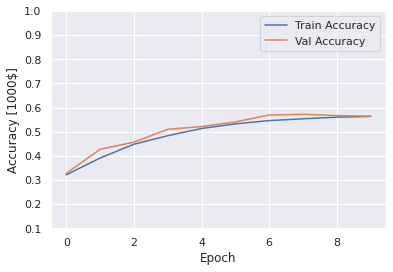

In [142]:
#Visualizing the results
import matplotlib.pyplot as plt
def plot_history(history_adam):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy [1000$]')
 plt.plot(history_adam.epoch, np.array(history_adam.history['acc']),
 label='Train Accuracy')
 plt.plot(history_adam.epoch, np.array(history_adam.history['val_acc']),
 label = 'Val Accuracy')
 plt.legend()
 plt.ylim([0.1, 1])
plot_history(history_adam)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history_adam):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Loss [1000$]')
 plt.plot(history_adam.epoch, np.array(history_adam.history['loss']),
 label='Train Loss')
 plt.plot(history_adam.epoch, np.array(history_adam.history['val_loss']),
 label = 'Val Loss')
 plt.legend()
 plt.ylim([0.5, 5])
plot_history(history_adam)


In [ ]:
'''Above model can be enhanced furthur by adjusting other hyperparameters or making some changes in input data.'''

In [ ]:
'''Furthur Analysis: We can also use machine learning model to analyze text summary data, to find useful insights.'''